In [56]:
import pandas as pd


In [57]:
ipc = pd.read_csv(
    "./data/IPC_H/ipc_enero2006_dic2021_homologacion_base_indec_dic2016_I.csv"
).set_index("indice_tiempo")
ipc

,nivel_general
indice_tiempo,
2006-12-01,25.798812
2007-01-01,26.093953
2007-02-01,26.172078
2007-03-01,26.371733
2007-04-01,26.568493
...,...
2021-08-01,510.394200
2021-09-01,528.496800
2021-10-01,547.080200


In [58]:
presupuesto = pd.read_csv("./data/presupuesto/2012-2022-finalidad-funcion.csv")
presupuesto

,ejercicio_presupuestario,finalidad_id,finalidad_desc,funcion_id,funcion_desc,credito_presupuestado,credito_vigente,credito_devengado,credito_comprometido,credito_pagado
0,2012,1,ADMINISTRACION GUBERNAMENTAL,1,Legislativa,2294.700917,3061.443763,3020.196348,3023.928596,2784.668903
1,2012,1,ADMINISTRACION GUBERNAMENTAL,2,Judicial,8405.975133,9498.596600,8836.840848,8839.804511,8338.435782
2,2012,1,ADMINISTRACION GUBERNAMENTAL,3,Dirección Superior Ejecutiva,3654.896740,4549.688987,3847.855685,3895.504312,3393.665257
3,2012,1,ADMINISTRACION GUBERNAMENTAL,4,Relaciones Exteriores,2787.331451,3000.368909,2687.494194,2695.650024,2476.021496
4,2012,1,ADMINISTRACION GUBERNAMENTAL,5,Relaciones Interiores,12102.487071,12170.920577,10938.697252,10941.780040,10415.195345
...,...,...,...,...,...,...,...,...,...,...
314,2022,4,SERVICIOS ECONOMICOS,5,Agricultura,39691.738630,39691.738630,13.612187,1286.686184,0.252613
315,2022,4,SERVICIOS ECONOMICOS,6,Industria,125917.922183,125917.922183,0.675015,98.748318,0.000000
316,2022,4,SERVICIOS ECONOMICOS,7,"Comercio, Turismo y Otros Servicios",45979.866685,45979.866685,63.162445,655.966621,7.687485
317,2022,4,SERVICIOS ECONOMICOS,8,Seguros y Finanzas,6989.655654,6989.655654,0.651868,23.369758,0.651868


In [59]:
total_anual = presupuesto.groupby("ejercicio_presupuestario").sum()["credito_vigente"]
total_anual

ejercicio_presupuestario
2012    5.885867e+05
2013    7.801498e+05
2014    1.164759e+06
2015    1.499476e+06
2016    2.215683e+06
2017    2.633515e+06
2018    3.379235e+06
2019    4.928184e+06
2020    7.762601e+06
2021    1.100019e+07
2022    1.077595e+07
Name: credito_vigente, dtype: float64

<AxesSubplot:xlabel='ejercicio_presupuestario'>

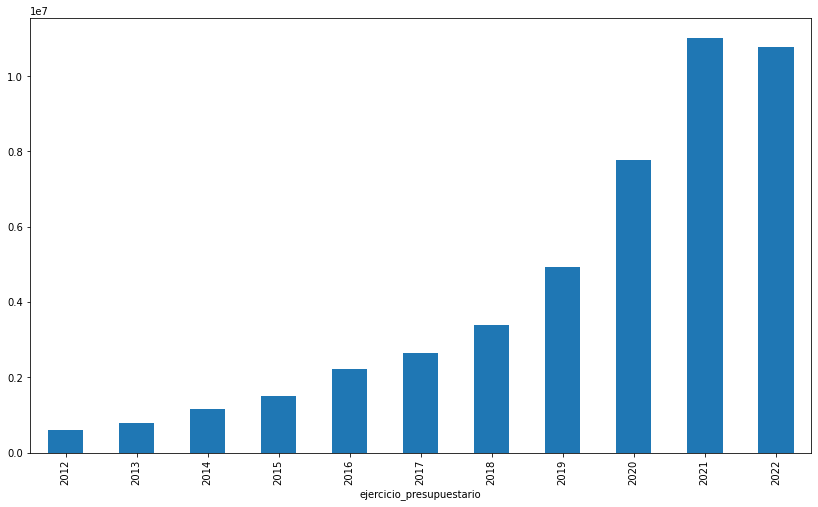

In [60]:

total_anual.plot.bar(figsize=(14,8))

In [61]:
ipc_index = []
tmp_i = total_anual.index
for index in tmp_i:
    index = str(index-1)+"-12-01"
    print(index)
    ipc_index.append(index)


2011-12-01
2012-12-01
2013-12-01
2014-12-01
2015-12-01
2016-12-01
2017-12-01
2018-12-01
2019-12-01
2020-12-01
2021-12-01


In [62]:
ipc_constante = ipc.loc["2021-12-01"].at["nivel_general"]
ipc_origen = ipc.loc[ipc_index]["nivel_general"]

<AxesSubplot:xlabel='ejercicio_presupuestario'>

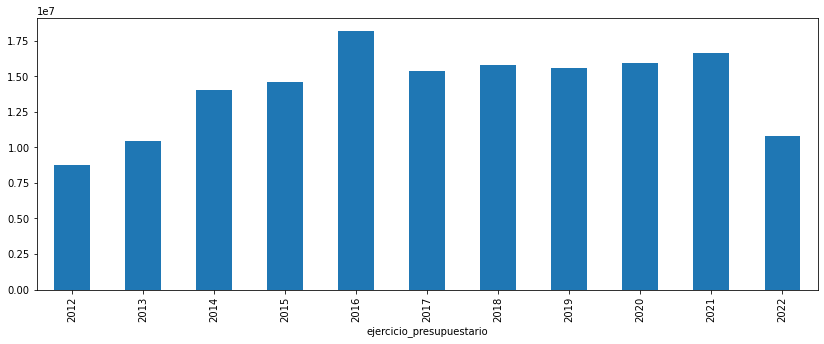

In [68]:
total_anual_constante = total_anual * (ipc_constante / ipc_origen.values)
total_anual_constante.plot.bar(figsize=(14, 5))


In [72]:
total_anual_constante_variacion = (total_anual_constante.diff()/total_anual_constante)*100
total_anual_constante_variacion

ejercicio_presupuestario
2012          NaN
2013    16.374506
2014    25.689214
2015     3.783869
2016    19.762308
2017   -18.670926
2018     2.743946
2019    -1.239951
2020     2.337570
2021     3.928512
2022   -54.082682
Name: credito_vigente, dtype: float64

In [ ]:

total_anual_constante_variacion.plot.bar(figsize=(14,5))